Analyzing Comps for: ['AVGO', 'NVDA', 'MRVL', 'AMD', 'ORCL', 'CSCO']


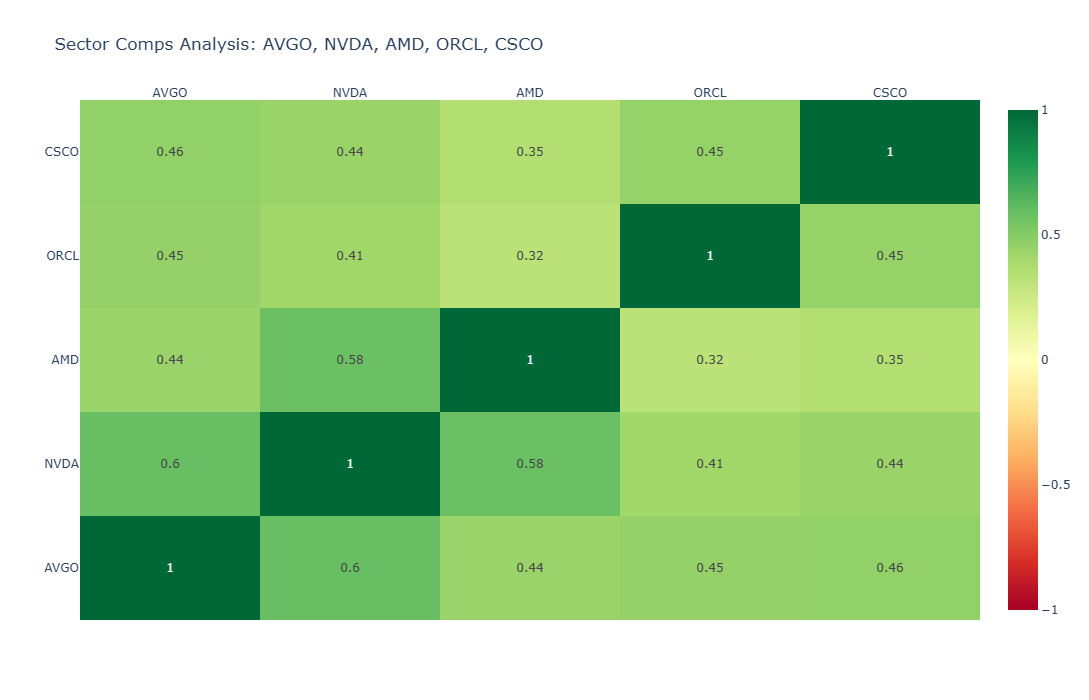

In [1]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np

def sector_comps_analysis(comps_list):
    print(f"Analyzing Comps for: {comps_list}")
    df_all = pd.read_csv('sp500_joined_closes.csv', index_col=0, low_memory=False)
    available_tickers = [t for t in comps_list if t in df_all.columns]
    df = df_all[available_tickers].apply(pd.to_numeric, errors='coerce').ffill()
    df_corr = df.pct_change(fill_method=None).corr()
    fig = go.Figure(data=go.Heatmap(
        z=df_corr.values, x=df_corr.columns, y=df_corr.index,
        colorscale='RdYlGn', zmin=-1, zmax=1,
        text=np.round(df_corr.values, 2),
        texttemplate="%{text}", 
        hovertemplate="X: %{x}<br>Y: %{y}<br>Corr: %{z:.3f}<extra></extra>"))
    fig.update_layout(title=f"Sector Comps Analysis: {', '.join(available_tickers)}", width=700, height=700,  xaxis={'side': 'top'})
    fig.show()
if __name__ == "__main__":
    my_sector = ['AVGO', 'NVDA', 'MRVL', 'AMD', 'ORCL', 'CSCO']
    sector_comps_analysis(my_sector)